In [2]:
pip install SciPy

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#load the dataset by reading the csv file
df = pd.read_csv("clean_kaggle_data.csv")

#randomly select 10 samples and have a look at the dataset
df.sample(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
13149,22134,217,25-29,Woman,South Korea,Bachelor’s degree,Data Analyst,< 1 years,Python,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,Paperspace / Gradient,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8013,13437,711,35-39,Man,India,Master’s degree,Data Analyst,10-20 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9559,16024,454,35-39,Prefer to self-describe,Czech Republic,Master’s degree,Data Analyst,10-20 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",Automated feature engineering/selection (e.g. ...,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5799,9785,3589,18-21,Man,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,Data Scientist,1-3 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11244,18957,314,25-29,Man,Bangladesh,Master’s degree,Data Scientist,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,Javascript,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,Visual Studio Code (VSCode),PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,15865,721,25-29,Man,Nigeria,Bachelor’s degree,Program/Project Manager,3-5 years,Python,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2306,3852,15539,30-34,Man,Kenya,Bachelor’s degree,Data Scientist,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,SQL,NaN,RStudio,NaN,Visual Studio Code (VSCode),NaN,NaN,NaN,Sublime Text,Vim / Emacs,NaN,Jupyt

In [6]:
df.Q25

0        30000
1        70000
2         1000
3        40000
4        40000
         ...  
15386     4000
15387    90000
15388    20000
15389     1000
15390     1000
Name: Q25, Length: 15391, dtype: int64

Q1: Exploratory Analysis

Text(0.5, 1.0, 'Average Salary by Country')

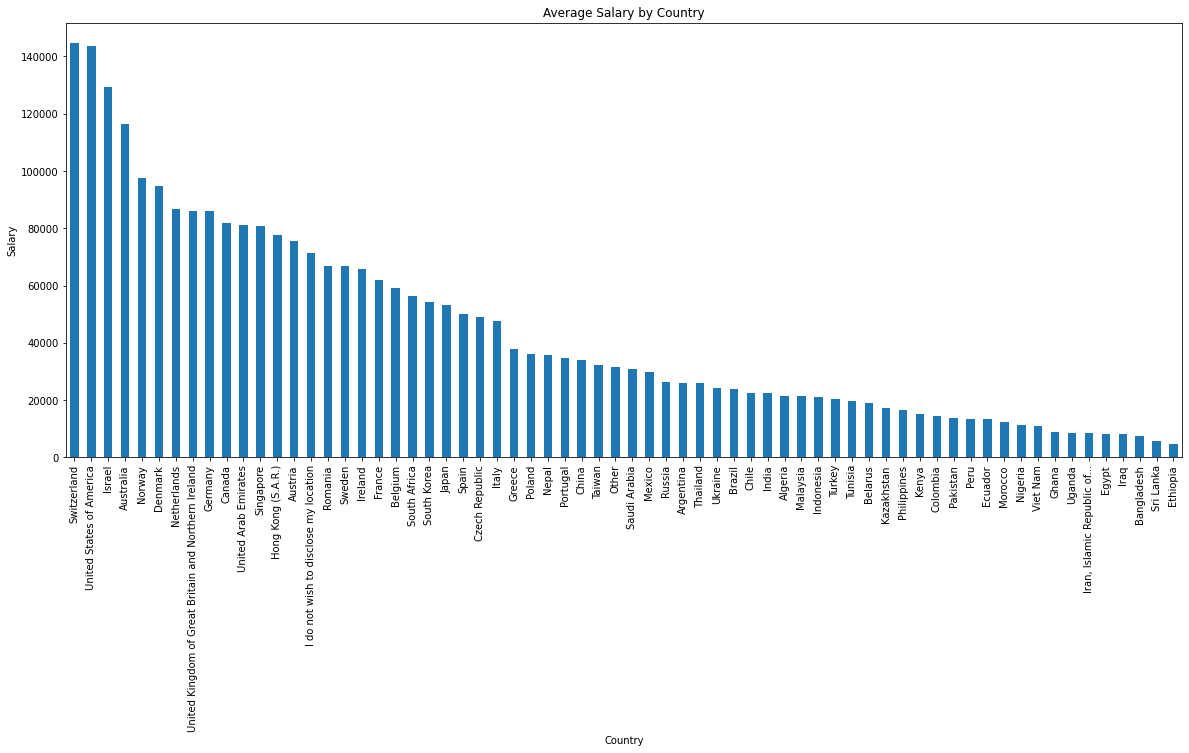

In [7]:
# plot the sorted mean salaries gourped by each country
# use groupby command to group by the dataframe by country and plot the column Q25 using bar chart in ascending order
plt.figure(figsize=(20,8))
df_groupby_country = df.groupby(["Q3"]).mean()
sort_mean_salary_bycountry = df_groupby_country.Q25.sort_values(ascending=False)
sort_mean_salary_bycountry.plot.bar()
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title("Average Salary by Country")

Text(0.5, 1.0, 'Average Salary by Education Level')

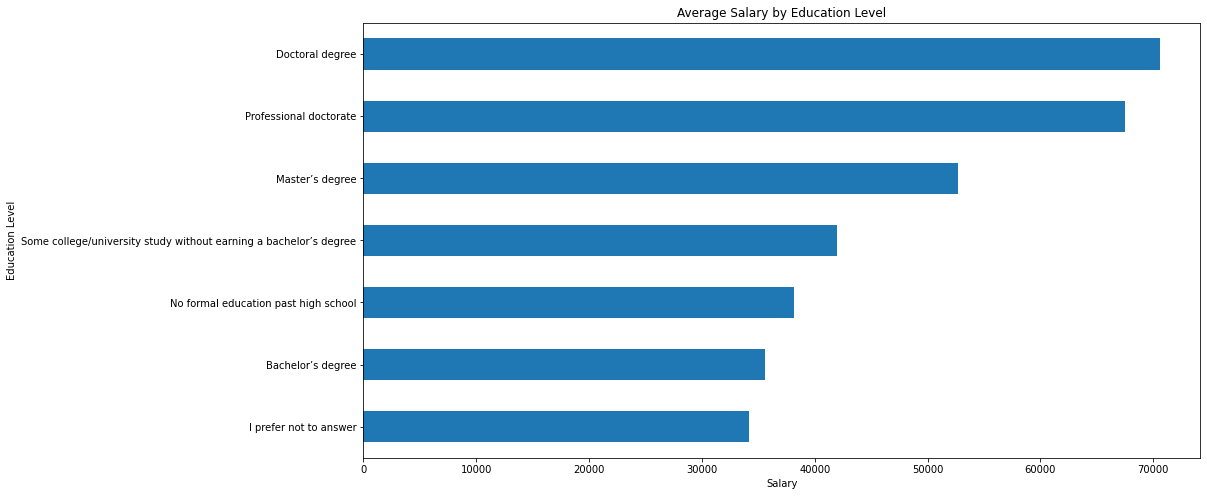

In [8]:
# plot the average salary categorized by education level
# use groupby command to group by the dataframe by education and visualiza the result using
# horizontal bar plot in a descending order
plt.figure(figsize=(15,8))
df_groupby_education = df.groupby(["Q4"]).mean()
sort_mean_salary_byeducation = df_groupby_education.Q25.sort_values(ascending=True)
sort_mean_salary_byeducation.plot(kind = "barh")
plt.xlabel('Salary')
plt.ylabel('Education Level')
plt.title("Average Salary by Education Level")

Text(0.5, 1.0, 'Average Salary by Professional Experience')

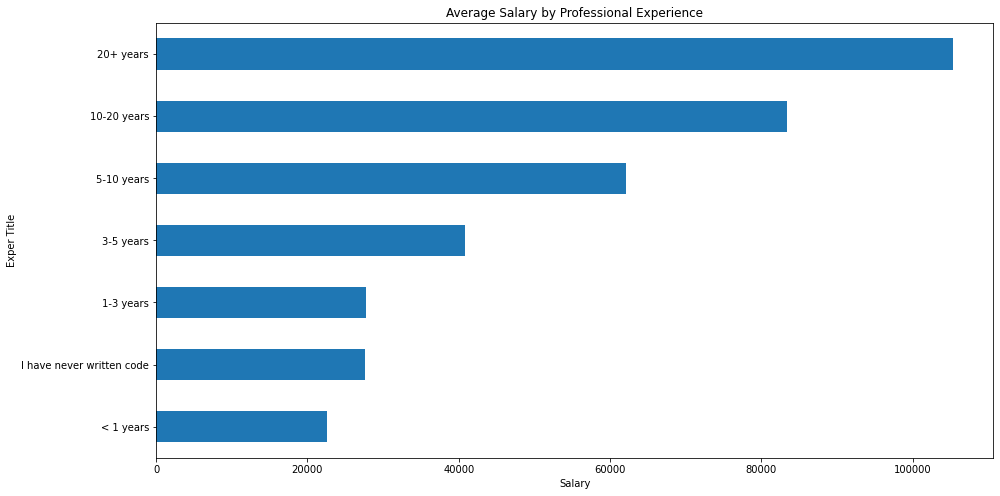

In [9]:
# plot the average salary categorized by years of professional experienece
# use groupby command to group by the dataframe by professional experienece and 
# visualiza the result using horizontal bar plot in a descending order
plt.figure(figsize=(15,8))
df_groupby_age = df.groupby(["Q6"]).mean()
sort_mean_salary_byage = df_groupby_age.Q25.sort_values(ascending=True)
sort_mean_salary_byage.plot(kind = "barh")
plt.xlabel('Salary')
plt.ylabel('Exper Title')
plt.title("Average Salary by Professional Experience")

Q2. Estimating the difference between average salary (Q25) of men vs. women (Q2).

In [10]:
# check if there is any null values
df.isna().sum()

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
                                       ...  
Q38_B_Part_8                           14917
Q38_B_Part_9                           15059
Q38_B_Part_10                          14089
Q38_B_Part_11                          12880
Q38_B_OTHER                            15177
Length: 370, dtype: int64

In [11]:
# notice there are too many columns in the output, so extract Q2 and Q25 columns and check is missing values again
df_new = df[["Q2", "Q25"]]
df_new.isna().sum()

Q2     0
Q25    0
dtype: int64

In [12]:
# compute descriptive statistics for salaries of man and woman
# apply condition on Q2 column and only extract the records of man and woman from the dataframe
# create new dataframe that contains Q2 and Q25 only for each gender
df_Man = df[df['Q2'] == "Man"]
df_Man_salary = df_Man[['Q2','Q25']]
df_Woman = df[df['Q2'] == "Woman"]
df_Woman_salary = df_Woman[['Q2','Q25']]

# report descriptive analysis on men's salary
print(df_Man_salary.describe())

                  Q25
count    12642.000000
mean     51193.600696
std      99979.274378
min       1000.000000
25%       2000.000000
50%      20000.000000
75%      60000.000000
max    1000000.000000


In [13]:
# report descriptive analysis on men's salary
print(df_Woman_salary.describe())

                  Q25
count     2482.000000
mean     34816.881547
std      72017.347888
min       1000.000000
25%       1000.000000
50%       7500.000000
75%      50000.000000
max    1000000.000000


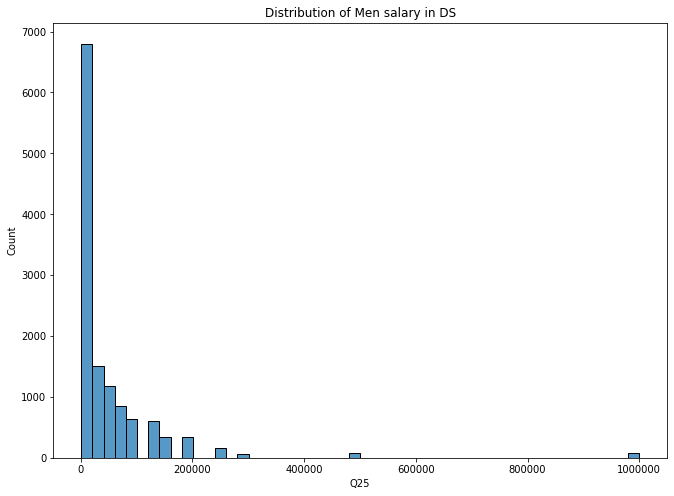

In [14]:
# plot the dataset of df_Man_salary to check what the distribution of of Men salary in DS looks like
plt.figure(figsize=(11,8))
df_Man_salary_plot = sns.histplot(df_Man_salary["Q25"], bins=50)
df_Man_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Men salary in DS")
plt.show()

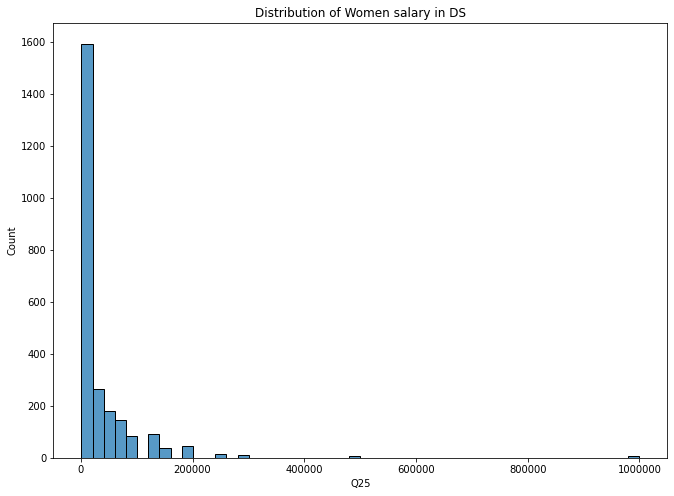

In [15]:
# plot the dataset of df_Woman_salary to check what the distribution of of Women salary in DS looks like
plt.figure(figsize=(11,8))
df_Woman_salary_plot = sns.histplot(df_Woman_salary["Q25"], bins=50)
df_Woman_salary_plot.ticklabel_format(style='plain')
plt.title("Distribution of Women salary in DS")
plt.show()

In [16]:
# use stats function from scipy to conduct t-test on the salary (Q25 column) of 
# df_Woman_salary and df_Man_salary dataframes
result_before_bootstrap = stats.ttest_ind(df_Man_salary["Q25"], df_Woman_salary["Q25"], equal_var=True)

display(result_before_bootstrap)

Ttest_indResult(statistic=7.774059663603156, pvalue=8.088812859676161e-15)

Since the p-value from the T-test result is smaller than 0.05 threshold, reject the null hypothesis. We can conclude that the difference of mean salaries of men and women is statistically significant. However, since two data samples are not normally distribured, the T-test assumptions are violated. Thus, this conclusion is unreliable.

In [17]:
# conduct bootstrap on the men salary dataframe by taking the mean of each bootstarp sample. 
# Set the size of each bootstrap sample equals to the length of the df_Man_salary dataframe. 
# Replicate for 1000 times
bootstrap_mean_man = pd.DataFrame(
    {"mean_salary": [df_Man_salary['Q25'].sample(n=len(df_Man_salary), 
                                                        replace = True).mean() for i in range (1000)]})

# print the bootstrapped dataframe, should have 1000 rows
bootstrap_mean_man

,mean_salary
0,52445.657333
1,50365.883563
2,51696.013289
3,50658.281917
4,50836.536940
...,...
995,51275.510204
996,51320.716659
997,49270.487265
998,52111.256130


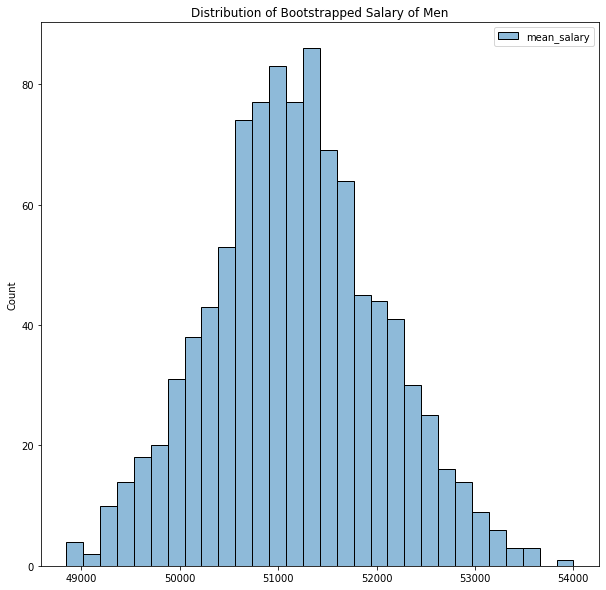

In [18]:
# plot the distribution of bootstrapped data of men's salary using seaborn histogram
plt.figure(figsize=(10,10))
bootstrap_man_mean = sns.histplot(bootstrap_mean_man, bins = 30)
bootstrap_man_mean.ticklabel_format(style='plain')
plt.title('Distribution of Bootstrapped Salary of Men')
plt.show()

In [19]:
# conduct bootstrap on the women salary dataframe by taking the mean of each bootstarp sample. 
# Set the size of each bootstrap sample equals to the length of the df_Woman_salary dataframe. 
# Replicate for 1000 times
bootstrap_mean_woman = pd.DataFrame(
    {"mean_salary": [df_Woman_salary['Q25'].sample(n=len(df_Woman_salary), 
                                                   replace = True).mean() for i in range (1000)]})
bootstrap_mean_woman

,mean_salary
0,36704.673650
1,34191.176471
2,32968.372280
3,34951.248993
4,32054.593070
...,...
995,33028.807413
996,34013.900081
997,38954.472200
998,33624.899275


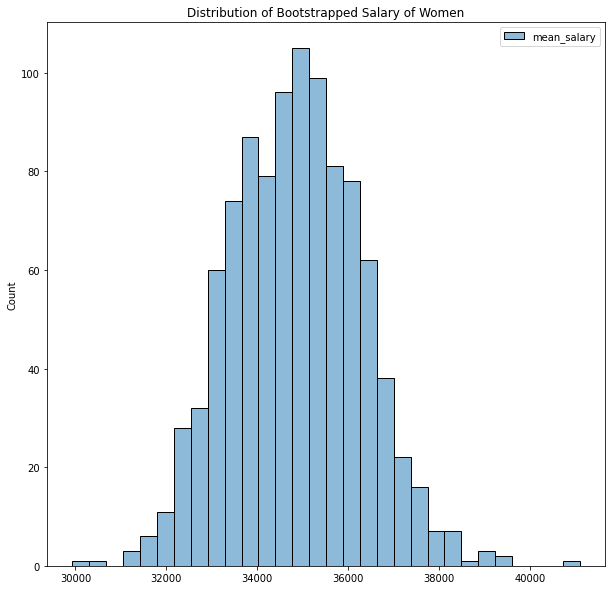

In [20]:
# plot the distribution of bootstrapped data of women's salary using seaborn histogram
plt.figure(figsize=(10,10))
bootstrap_woman_mean = sns.histplot(bootstrap_mean_woman, bins = 30)
bootstrap_woman_mean.ticklabel_format(style='plain')
plt.title('Distribution of Bootstrapped Salary of Women')
plt.show()

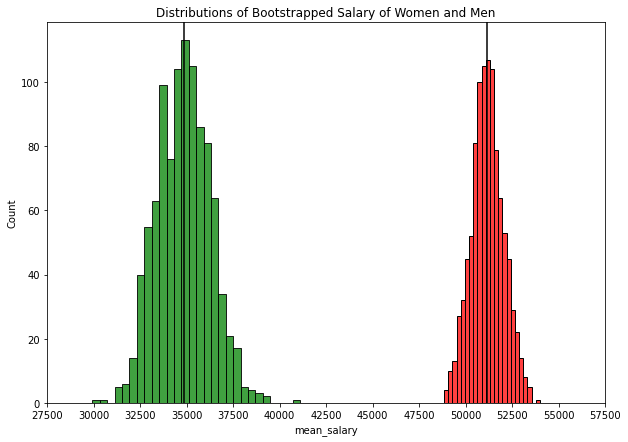

In [21]:
# plot the distriburions of bootstrapped data of two genders on the same graph
plt.figure(figsize=(10,7))
bootstrap_man_mean = sns.histplot(bootstrap_mean_man.mean_salary, color = "r")
# set a black vertical line in the position of sample mean
bootstrap_man_mean.axvline(bootstrap_mean_man.mean_salary.mean(), color = "black")

bootstrap_woman_mean = sns.histplot(bootstrap_mean_woman.mean_salary, color = "g")
# set a black vertical line in the position of sample mean
bootstrap_woman_mean.axvline(bootstrap_mean_woman.mean_salary.mean(),color = "black")
plt.xticks(np.arange(27500, 58000, 2500))
plt.title('Distributions of Bootstrapped Salary of Women and Men')
plt.show()

In [22]:
# calculate the difference of means by subtracting the bootstrapped women's salary 
# from the bootstrapped men's salary 
difference = bootstrap_mean_man.mean_salary - bootstrap_mean_woman.mean_salary
difference

0      15740.983682
1      16174.707092
2      18727.641009
3      15707.032925
4      18781.943870
           ...     
995    18246.702791
996    17306.816578
997    10316.015065
998    18486.356856
999    15781.940906
Name: mean_salary, Length: 1000, dtype: float64

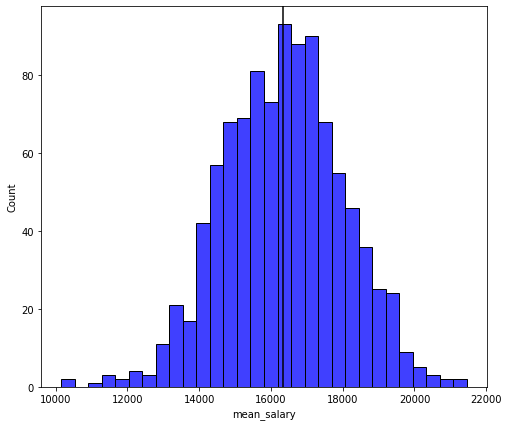

In [23]:
# plot the distribution of the difference in means
plt.figure(figsize=(8,7))
difference_plot = sns.histplot(difference, color = "b", bins = 30)
difference_plot.axvline(difference.mean(), color = "black")
plt.show()

In [24]:
# conduct T-test again to see if the means of salaries between two genders are different using bootstrapped dataset

res_mean_bootsrap = stats.ttest_ind(bootstrap_mean_man["mean_salary"], bootstrap_mean_woman["mean_salary"], equal_var=True)

display(res_mean_bootsrap)

Ttest_indResult(statistic=309.59762463290195, pvalue=0.0)

The T-test results show a p-value = 0 (p-value <0.05), which means we have strong evidence to reject the null hypothesis. We can draw the conclusion that the differece of means of salaries earned by women and men in DS is statistically significant.

Q3. Use one-way ANOVA to test out the differences of means of salary among people have "Doctoral Degree", "Master's Degree", and "Bachelor's Degree".

In [25]:
# extract the Q4, Q25 columns from the dataset
df_education_salary = df[['Q4','Q25']]
df_education_salary

,Q4,Q25
0,Bachelor’s degree,30000
1,Master’s degree,70000
2,Master’s degree,1000
3,Doctoral degree,40000
4,Doctoral degree,40000
...,...,...
15386,Bachelor’s degree,4000
15387,Bachelor’s degree,90000
15388,Bachelor’s degree,20000
15389,Doctoral degree,1000


In [26]:
# check the missing values
df_education_salary.isna().sum()

Q4     0
Q25    0
dtype: int64

In [27]:
# extract the rows that belongs to Doctoral, Professional Doctorate, Master's and Bachelor's degrees
df_education_doc = df_education_salary[df_education_salary.Q4 == "Doctoral degree"] 
df_education_master = df_education_salary[df_education_salary.Q4 == "Master’s degree"] 
df_education_bachelor = df_education_salary[df_education_salary.Q4 == "Bachelor’s degree"]

# concatinate the three dataframe together for a summary view
df_education_concat = pd.concat([df_education_doc, df_education_master,df_education_bachelor], axis=0)
len(df_education_concat)

13793

In [28]:
# check if there is any null value that should be dropped
df_education_concat.isna().sum()

Q4     0
Q25    0
dtype: int64

In [29]:
# perform descriptive statistics on each education group
df_education_concat.groupby("Q4").describe()

Q25                ...                    
                    count          mean  ...      75%        max
Q4                                       ...                    
Bachelor’s degree  4777.0  35578.291815  ...  40000.0  1000000.0
Doctoral degree    2217.0  70641.181777  ...  90000.0  1000000.0
Master’s degree    6799.0  52706.868657  ...  70000.0  1000000.0

[3 rows x 8 columns]

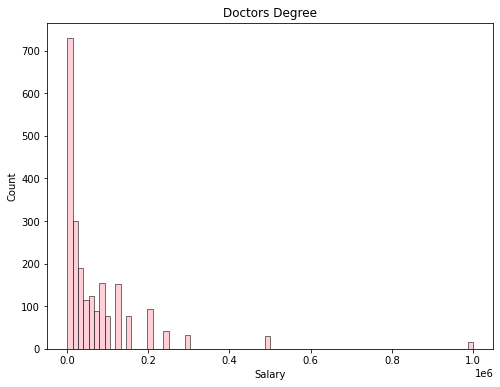

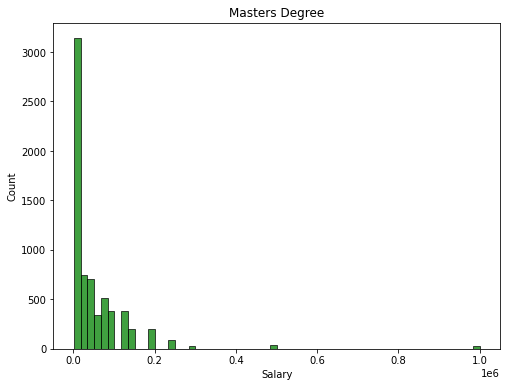

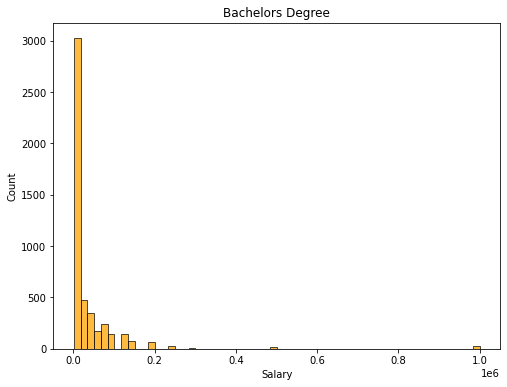

In [30]:
# before conduct ANOVA, plot the each class of data and check if the data is normally distributed 
plt.figure(figsize=(8,6))
difference_plot = sns.histplot(df_education_doc.Q25, color = "pink").set_title('Doctors Degree')
plt.xlabel('Salary')
plt.show()

plt.figure(figsize=(8,6))
difference_plot = sns.histplot(df_education_master.Q25, color = "green", bins = 60).set_title('Masters Degree')
plt.xlabel('Salary')
plt.show()

plt.figure(figsize=(8,6))
difference_plot = sns.histplot(df_education_bachelor.Q25, color = "orange", bins = 60).set_title('Bachelors Degree')
plt.xlabel('Salary')
plt.show()

In [31]:
fvalue, pvalue = stats.f_oneway(df_education_doc.Q25, df_education_master.Q25, df_education_bachelor.Q25)
print(fvalue, pvalue)

109.75776160573479 5.107696325253651e-48


In [32]:
#Conduct the bootstrapping 
bootstrap_doc = pd.DataFrame({"mean_salary_doc": [df_education_doc['Q25'].sample(n=len(df_education_doc), replace = True).mean() for i in range (1000)]})
bootstrap_master = pd.DataFrame({"mean_salary_master": [df_education_master['Q25'].sample(n=len(df_education_master), replace = True).mean() for i in range (1000)]})
bootstrap_bachelor = pd.DataFrame({"mean_salary_bachelor": [df_education_bachelor['Q25'].sample(n=len(df_education_bachelor), replace = True).mean() for i in range (1000)]})

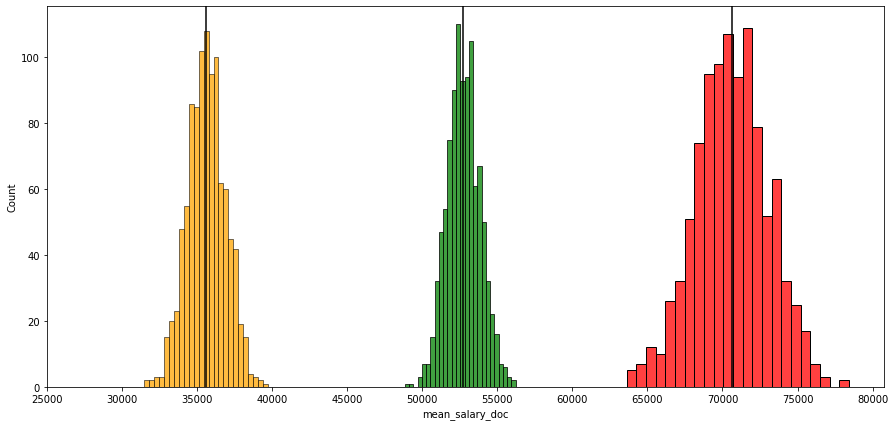

In [33]:
# plot the distribution of three bootsrapping samples and see the difference
import numpy as np

plt.figure(figsize=(15,7))
bootstrap_doc_plot = sns.histplot(bootstrap_doc.mean_salary_doc, color = "r")
bootstrap_doc_plot.axvline(bootstrap_doc.mean_salary_doc.mean(), color = "black")
bootstrap_master_plot = sns.histplot(bootstrap_master.mean_salary_master, color = "g")
bootstrap_master_plot.axvline(bootstrap_master.mean_salary_master.mean(),color = "black")
bootstrap_bachelor_plot = sns.histplot(bootstrap_bachelor.mean_salary_bachelor, color = "orange")
bootstrap_bachelor_plot.axvline(bootstrap_bachelor.mean_salary_bachelor.mean(),color = "black")
plt.xticks(np.arange(25000, 85000, 5000))
plt.show()

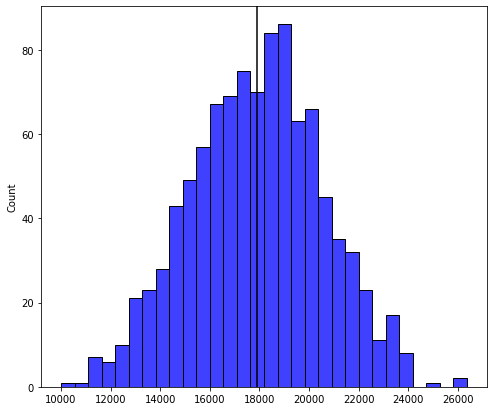

In [34]:
# plot the distribution of each pair of mean difference in education level

#plot the distribution of mean difference between Doctorate Degree and Master Degree
diff_doc_master = bootstrap_doc.mean_salary_doc - bootstrap_master.mean_salary_master
plt.figure(figsize=(8,7))
diff_doc_master_plot = sns.histplot(diff_doc_master, color = "b", bins = 30)
diff_doc_master_plot.axvline(diff_doc_master.mean(), color = "black")
plt.show()

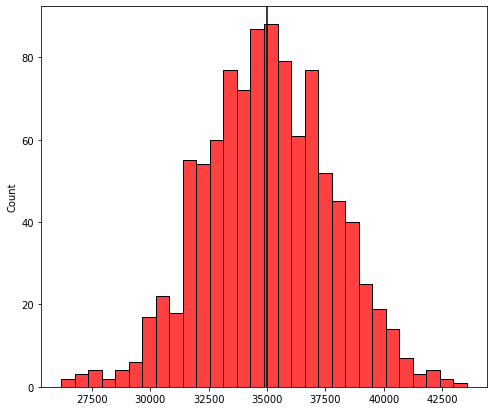

In [35]:
#plot the distribution of mean difference between Master Degree and Doctorate Degree
diff_doc_bachelor = bootstrap_doc.mean_salary_doc - bootstrap_bachelor.mean_salary_bachelor
plt.figure(figsize=(8,7))
diff_doc_bachelor_plot = sns.histplot(diff_doc_bachelor, color = "r", bins = 30)
diff_doc_bachelor_plot.axvline(diff_doc_bachelor.mean(), color = "black")
plt.show()

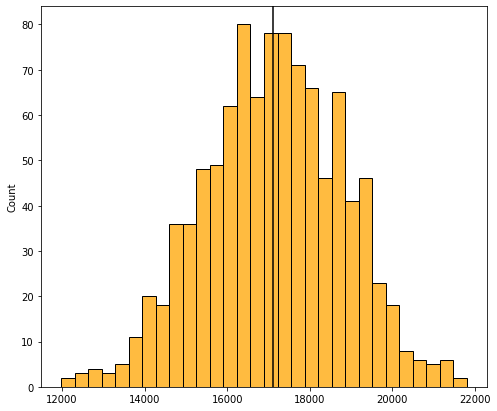

In [36]:
#plot the distribution of mean difference between Doctorate Degree and Bachelor Degree
diff_master_bachelor = bootstrap_master.mean_salary_master - bootstrap_bachelor.mean_salary_bachelor
plt.figure(figsize=(8,7))
diff_master_bachelor_plot = sns.histplot(diff_master_bachelor , color = "orange", bins = 30)
diff_master_bachelor_plot.axvline(diff_master_bachelor .mean(), color = "black")
plt.show()

In [37]:
# conduct ANOVA test again with bootstrapping data to see if the means are different among three groups
fvalue, pvalue = stats.f_oneway(bootstrap_doc.mean_salary_doc, bootstrap_bachelor.mean_salary_bachelor, bootstrap_master.mean_salary_master)
print(fvalue, pvalue)

106123.6828363208 0.0


The T-test results show a p-value = 0 (p-value <0.05), which means we have strong evidence to reject the null hypothesis. We can draw the conclusion that not all means of three groups are equall. The average salaries earned by some groups are different from some other groups.